In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"C:\Users\harshit\Downloads\open cv\fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x=df.drop('label',1).iloc[0:10000,:]
y=df['label'].iloc[:10000]

# MODEL_1: LOGISITIC REGRESSION

In [64]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='saga')
model_1=lr.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached wh

In [65]:
df_test=pd.read_csv(r"C:\Users\harshit\Downloads\open cv\fashion-mnist_test.csv")
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
x_test=df_test.drop('label',1)
y_test=df_test.label

In [67]:
y_pred=model_1.predict(x_test)
y_pred

array([0, 1, 2, ..., 8, 6, 2], dtype=int64)

In [68]:
from sklearn import metrics
confusion_mtrx=metrics.confusion_matrix(y_test,y_pred)
confusion_mtrx

array([[805,   8,  15,  47,   7,   0,  85,   0,  30,   3],
       [  0, 969,   4,  18,   2,   2,   5,   0,   0,   0],
       [ 23,   2, 735,  13, 134,   0,  82,   0,  11,   0],
       [ 27,  21,  12, 870,  42,   0,  21,   0,   6,   1],
       [  0,   1,  77,  47, 782,   0,  91,   0,   2,   0],
       [  1,   3,   0,   1,   0, 852,   0,  73,  19,  51],
       [170,   7, 104,  45, 108,   0, 539,   0,  27,   0],
       [  0,   0,   0,   0,   0,  29,   0, 916,   0,  55],
       [  2,   0,   8,   5,   8,  12,  18,   6, 940,   1],
       [  0,   0,   0,   0,   0,  10,   0,  39,   1, 950]], dtype=int64)

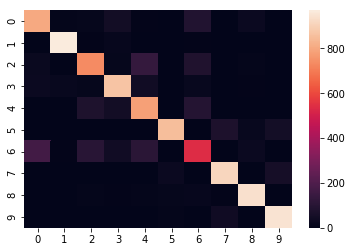

In [69]:
import seaborn as sns
sns.heatmap(confusion_mtrx)

In [70]:
metrics.accuracy_score(y_test,y_pred)

0.83579999999999999

# MODEL_2: KNN Algorithm

In [52]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier(n_neighbors=10)
#param_grid={'n_neighbors':np.arange(1,25)}
#knn_gscv=GridSearchCV(knn,param_grid,cv=5)
#knn_gscv.fit(x,y)
#knn_gscv.best_params_
model_2=knn.fit(x,y)

In [53]:
y_pred_2=model_2.predict(x_test)
y_pred_2

array([0, 1, 2, ..., 8, 8, 4], dtype=int64)

In [54]:
from sklearn import metrics
confusion_mtrx_2=metrics.confusion_matrix(y_test,y_pred_2)
confusion_mtrx_2

array([[874,   1,  20,  17,   4,   0,  71,   2,  10,   1],
       [ 11, 949,  13,  18,   2,   0,   7,   0,   0,   0],
       [ 20,   0, 754,   7, 119,   0,  96,   0,   4,   0],
       [ 52,  11,  17, 844,  46,   0,  30,   0,   0,   0],
       [  6,   1, 105,  32, 741,   0, 111,   0,   4,   0],
       [  2,   0,   2,   1,   0, 735,   9, 153,   6,  92],
       [245,   1, 118,  19,  78,   0, 528,   0,  11,   0],
       [  1,   0,   0,   0,   0,   7,   0, 934,   0,  58],
       [  3,   1,  32,   8,   5,   1,  24,  18, 906,   2],
       [  0,   0,   0,   0,   0,   3,   1,  46,   0, 950]], dtype=int64)

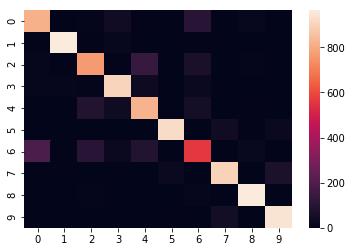

In [55]:
import seaborn as sns
sns.heatmap(confusion_mtrx)

In [56]:
metrics.accuracy_score(y_test,y_pred_2)

0.82150000000000001

# MODEL_3: RANDOM FOREST CLASSIFIER.

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
model_3=rfc.fit(x,y)

In [13]:
y_pred_3=model.predict(x_test)
y_pred_3

array([0, 1, 2, ..., 8, 8, 2], dtype=int64)

In [14]:
from sklearn import metrics
confusion_mtrx_3=metrics.confusion_matrix(y_test,y_pred_3)
confusion_mtrx_3

array([[819,   1,  10,  42,   5,   3, 104,   0,  16,   0],
       [  5, 963,   7,  17,   1,   1,   6,   0,   0,   0],
       [ 12,   1, 766,   5, 138,   1,  66,   0,  11,   0],
       [ 15,  12,   9, 905,  32,   0,  26,   0,   1,   0],
       [  1,   1,  87,  35, 822,   0,  50,   0,   4,   0],
       [  0,   0,   0,   0,   0, 924,   0,  45,   5,  26],
       [191,   2, 104,  30,  90,   0, 564,   0,  19,   0],
       [  0,   0,   0,   0,   0,  28,   0, 902,   1,  69],
       [  1,   1,  11,   1,   2,   3,  13,   3, 964,   1],
       [  0,   0,   0,   0,   0,   7,   1,  46,   3, 943]], dtype=int64)

In [15]:
metrics.accuracy_score(y_test,y_pred_3)

0.85719999999999996

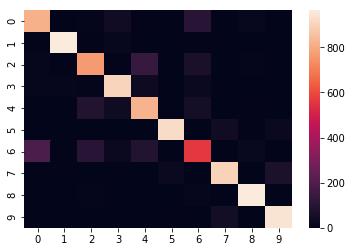

In [16]:

sns.heatmap(confusion_mtrx_3)

# MODEL_4: NAIVE BAYES

In [17]:
from sklearn.naive_bayes import BernoulliNB
gnb=BernoulliNB()
model_4=gnb.fit(x,y)

In [18]:
y_pred_4=model_4.predict(x_test)
y_pred_4

array([0, 1, 2, ..., 8, 6, 4], dtype=int64)

In [20]:
confusion_mtrx_4=metrics.confusion_matrix(y_test,y_pred_4)
confusion_mtrx_4

array([[751,   3,   7, 131,   8,   0,  73,   1,  26,   0],
       [  3, 923,  22,  36,  16,   0,   0,   0,   0,   0],
       [  5,   1, 689,  11, 208,   0,  69,   0,  17,   0],
       [ 43,  61,   4, 836,  38,   0,  16,   0,   2,   0],
       [  1,   5, 336, 127, 482,   0,  40,   0,   9,   0],
       [  0,   0,   1,   2,   0, 678,   1, 224,  18,  76],
       [211,   4, 221,  91, 242,   0, 196,   0,  35,   0],
       [  0,   0,   0,   0,   0,   8,   0, 869,   0, 123],
       [  0,   3,   8,  58,   3,   0,  30,  44, 852,   2],
       [  0,   0,   1,   4,   0,   0,   2, 126,   7, 860]], dtype=int64)

In [21]:
metrics.accuracy_score(y_test,y_pred_4)

0.71360000000000001

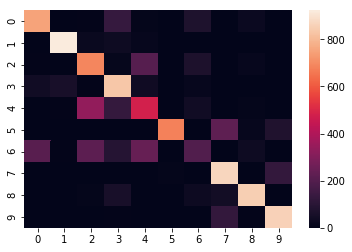

In [22]:
sns.heatmap(confusion_mtrx_4)

# MODEL_5:  Linear discriminant analysis.

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda= LinearDiscriminantAnalysis()
model_5=lda.fit(x,y)

In [25]:
y_pred_5=model_5.predict(x_test)
y_pred_5

array([0, 1, 6, ..., 8, 8, 2], dtype=int64)

In [27]:
confusion_mtrx_5=metrics.confusion_matrix(y_test,y_pred_5)
confusion_mtrx_5

array([[752,   1,  21,  79,   1,   2, 128,   0,  16,   0],
       [  2, 945,   6,  34,   1,   1,  10,   0,   1,   0],
       [ 18,   0, 696,  13, 152,   3, 108,   0,  10,   0],
       [ 22,   4,  14, 866,  31,   2,  61,   0,   0,   0],
       [  0,   1,  82,  27, 764,   1, 122,   0,   3,   0],
       [  1,   0,   1,   1,   0, 870,   5,  71,   6,  45],
       [146,   0, 101,  49,  89,   3, 591,   0,  21,   0],
       [  0,   0,   0,   0,   0,  66,   0, 862,   0,  72],
       [  7,   0,  10,   8,   4,  36,  50,   6, 875,   4],
       [  0,   0,   0,   0,   0,  34,   0,  51,   0, 915]], dtype=int64)

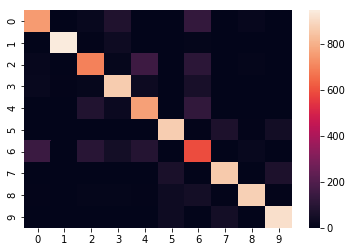

In [28]:
sns.heatmap(confusion_mtrx_5)

In [29]:
metrics.accuracy_score(y_test,y_pred_5)

0.81359999999999999

# MODEL_6: QUADRATIC DIS. ANALYSIS.

In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
qda= QuadraticDiscriminantAnalysis()
model_6=qda.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-

In [31]:
y_pred_6=model_6.predict(x_test)
y_pred_6

array([0, 1, 6, ..., 8, 8, 6], dtype=int64)

In [33]:
metrics.accuracy_score(y_test,y_pred_6)

0.59199999999999997

In [34]:
confusion_mtrx_6=metrics.confusion_matrix(y_test,y_pred_5)
confusion_mtrx_6

array([[752,   1,  21,  79,   1,   2, 128,   0,  16,   0],
       [  2, 945,   6,  34,   1,   1,  10,   0,   1,   0],
       [ 18,   0, 696,  13, 152,   3, 108,   0,  10,   0],
       [ 22,   4,  14, 866,  31,   2,  61,   0,   0,   0],
       [  0,   1,  82,  27, 764,   1, 122,   0,   3,   0],
       [  1,   0,   1,   1,   0, 870,   5,  71,   6,  45],
       [146,   0, 101,  49,  89,   3, 591,   0,  21,   0],
       [  0,   0,   0,   0,   0,  66,   0, 862,   0,  72],
       [  7,   0,  10,   8,   4,  36,  50,   6, 875,   4],
       [  0,   0,   0,   0,   0,  34,   0,  51,   0, 915]], dtype=int64)

# MODEL_7: SVM

In [57]:
from sklearn.svm import SVC
clf=SVC(kernel='linear',C=5)
model_7=clf.fit(x,y)

In [58]:
y_pred_7=model.predict(x_test)
y_pred_7

array([0, 1, 2, ..., 8, 8, 2], dtype=int64)

In [60]:
confusion_mtrx_7=metrics.confusion_matrix(y_test,y_pred_7)
confusion_mtrx_7

array([[819,   1,  10,  42,   5,   3, 104,   0,  16,   0],
       [  5, 963,   7,  17,   1,   1,   6,   0,   0,   0],
       [ 12,   1, 766,   5, 138,   1,  66,   0,  11,   0],
       [ 15,  12,   9, 905,  32,   0,  26,   0,   1,   0],
       [  1,   1,  87,  35, 822,   0,  50,   0,   4,   0],
       [  0,   0,   0,   0,   0, 924,   0,  45,   5,  26],
       [191,   2, 104,  30,  90,   0, 564,   0,  19,   0],
       [  0,   0,   0,   0,   0,  28,   0, 902,   1,  69],
       [  1,   1,  11,   1,   2,   3,  13,   3, 964,   1],
       [  0,   0,   0,   0,   0,   7,   1,  46,   3, 943]], dtype=int64)

In [62]:
metrics.accuracy_score(y_test,y_pred_7)

0.85719999999999996

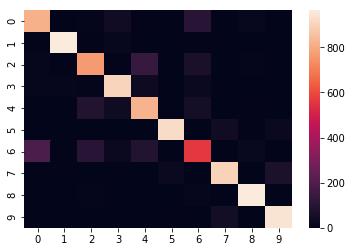

In [63]:
sns.heatmap(confusion_mtrx_7)

# verification of model using open cv

In [75]:
dict_1={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}
dict_1

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [76]:
import cv2

In [91]:

b=np.array(x_test.iloc[39]).reshape(28,28)                               # correct
c=cv2.imwrite(r'C:\Users\harshit\Downloads\open cv\images\IMG_.jpg',b)
a=y_pred[39]
c,dict_1[a]


(True, 'Bag')

In [89]:
a_1=np.array(x_test.iloc[412]).reshape(28,28)
b_1=cv2.imwrite(r'C:\Users\harshit\Downloads\open cv\images\IMG_1.jpg',a_1)     # correct
b_2=dict_1[y_pred[412]]
b_1,b_2

(True, 'Sandal')

In [96]:
a_2=np.array(x_test.iloc[456]).reshape(28,28)
b_2=cv2.imwrite(r'C:\Users\harshit\Downloads\open cv\images\IMG_2.jpg',a_2)     # correct
b_2,dict_1[y_pred[456]]

(True, 'Coat')

In [104]:
a_3=np.array(x_test.iloc[9999]).reshape(28,28)
b_3=cv2.imwrite(r'C:\Users\harshit\Downloads\open cv\images\IMG_3.jpg',a_3)
b_3,dict_1[y_pred[9999]],dict_1[y_pred_2[9999]],dict_1[y_pred_3[9999]],dict_1[y_pred_4[9999]],dict_1[y_pred_5[9999]],dict_1[y_pred_6[9999]],dict_1[y_pred_7[9999]]

(True, 'Pullover', 'Coat', 'Pullover', 'Coat', 'Pullover', 'Shirt', 'Pullover')